## Exploratory Data Analysis of Starcraft Dataset 
### By: Summer Long

#### Importing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
sc = pd.read_csv('data/starcraft_player_data.csv')

#### Examining columns for missing values

In [3]:
# checking for null and abnormal values
for col in sc.columns:
    print(sc.loc[:, col].sort_values(ascending=False, na_position='first').head(5))

3394    10095
3393    10094
3392    10092
3391    10090
3390    10089
Name: GameID, dtype: int64
3394    8
3369    8
3367    8
3366    8
3365    8
Name: LeagueIndex, dtype: int64
3394    ?
3369    ?
3367    ?
3366    ?
3365    ?
Name: Age, dtype: object
3394    ?
3372    ?
3365    ?
3341    ?
3366    ?
Name: HoursPerWeek, dtype: object
3394    ?
3354    ?
3368    ?
3367    ?
3366    ?
Name: TotalHours, dtype: object
734     389.8314
3393    375.8664
3277    372.6426
3373    364.8504
3372    355.3518
Name: APM, dtype: float64
2746    0.043088
3373    0.042576
3277    0.042258
1810    0.038439
734     0.038416
Name: SelectByHotkeys, dtype: float64
3349    0.001752
3354    0.001750
2870    0.001648
3384    0.001627
3378    0.001569
Name: AssignToHotkeys, dtype: float64
110     10
1884    10
1674    10
3214    10
1654    10
Name: UniqueHotkeys, dtype: int64
197     0.003019
807     0.001974
1109    0.001576
877     0.001530
921     0.001489
Name: MinimapAttacks, dtype: float64
3362    0.00

In [6]:
question_mark_counts = (sc == '?').sum()
print(question_mark_counts)

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
Rank                     0
dtype: int64


Age, HoursPerWeek, and TotalHours all have '?' values. These are treated as 'missing' or 'unknown'.

In [48]:
# All rows that are missing age are also missing HPW & TH

print(sc.loc[:, ['Age', 'HoursPerWeek', 'TotalHours']].eq('?').all(axis=1).sum())

55


In [53]:
# One row is missing both, one is missing only total hours
# both players are Diamond

sc.loc[(sc.loc[:, 'Age'] != '?') & ((sc.loc[:, 'HoursPerWeek'] == '?') | (sc.loc[:, 'TotalHours'] == '?')), :]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,Rank
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,...,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116,Diamond
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,...,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338,Diamond


In [14]:
sc.loc[(sc.loc[:, 'Age'] == '?') & (sc.loc[:, 'HoursPerWeek'] == '?') & (sc.loc[:, 'TotalHours'] == '?'), :]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,Rank
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,...,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000,Professional leagues
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,...,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000,Professional leagues
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,...,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000,Professional leagues
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,...,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000,Professional leagues
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,...,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000,Professional leagues
3345,10017,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,...,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048,Professional leagues
3346,10018,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,...,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000,Professional leagues
3347,10021,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,...,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000,Professional leagues
3348,10022,8,?,?,?,210.5088,0.007974,0.000867,7,0.000548,...,0.006518,15.7856,30.7156,4.8058,34,0.000817,6,0.000000,0.000000,Professional leagues
3349,10023,8,?,?,?,248.0118,0.014722,0.001752,7,0.000375,...,0.004115,17.4656,34.2357,7.8973,20,0.001111,8,0.000000,0.000000,Professional leagues


In [17]:
# looking at dataframe, observe that everyone who is in professional leagues has unreported age, hrs/week, hrs/total
# confirm below
len(sc[sc['Rank'] == 'Professional leagues'])

55

In [59]:
## fill '?' with na
sc.replace('?', np.nan, inplace=True)

In [71]:
## cast to float since it was an object due to mix of int and str
sc.loc[:, sc.columns[2:5]] = sc.loc[:, sc.columns[2:5]].astype('float64')

In [36]:
## dictionary to map string representation to LeagueIndex

rank_dict = {1: 'Bronze', 
             2: 'Silver', 
             3: 'Gold', 
             4: 'Platinum', 
             5: 'Diamond', 
             6: 'Master',
             7: 'GrandMaster',
             8: 'Professional leagues'}

sc.loc[:, 'Rank'] = sc.loc[:, 'LeagueIndex'].apply(lambda x: rank_dict.get(x))


In [25]:
## string representation to color for plotting
color_mapping = {
    'Bronze': '#CD7F32',
    'Silver': '#C0C0C0',
    'Gold': '#FFD700',
    'Platinum': '#e5e4e2',
    'Diamond': '#b9f2ff',
    'Master': '#0096FF',
    'GrandMaster': '#FFCDA1',
    'Professional leagues': '#BDB5D5'
    }

#### Rank distribution

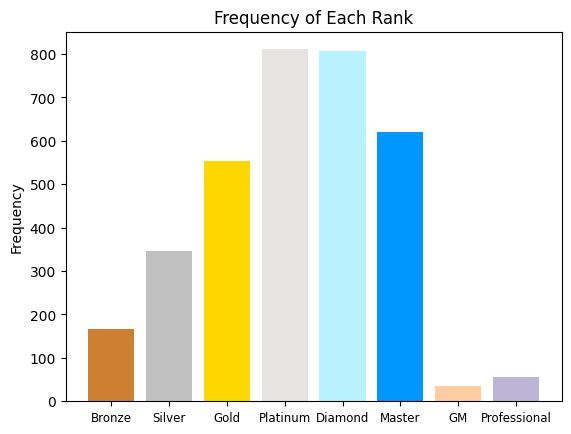

In [37]:
rank_counts = sc['Rank'].value_counts()
rank_counts = rank_counts.loc[list(rank_dict.values())]
bar_colors = [color_mapping.get(label) for label in rank_counts.index]
modified_labels = ['GM' if label == 'GrandMaster' else 'Professional' if label == 'Professional leagues' else label for label in rank_counts.index]
plt.bar(modified_labels, rank_counts.values, color=bar_colors)

plt.xticks(fontsize=8.5) 

plt.ylabel('Frequency')
plt.title('Frequency of Each Rank')
plt.show()


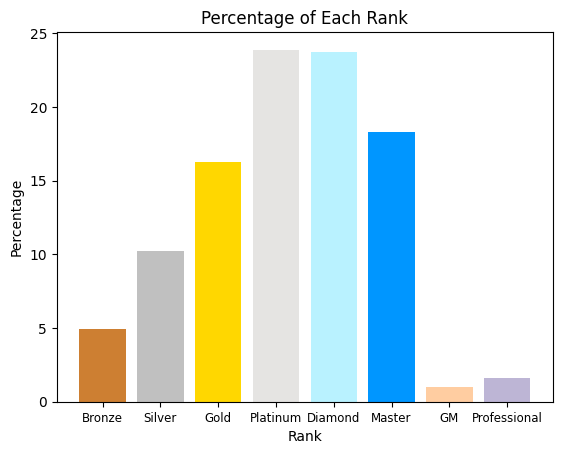

In [38]:
percentage = (rank_counts / sc.shape[0]) * 100
plt.bar(modified_labels, percentage, color=bar_colors)
plt.xticks(fontsize=8.5) 

plt.xlabel('Rank')
plt.ylabel('Percentage')
plt.title('Percentage of Each Rank')

plt.show()

In [8]:
# Platinum is the average rank
sc.loc[:, 'LeagueIndex'].mean()

4.184094256259205

#### Feature by Target Variable

In [54]:
## function for plotting by average

def plot_mean_by_rank(df, col):
    avg = df.groupby('Rank')[col].mean()
    avg = avg.loc[list(rank_dict.values())]  

    modified_labels = ['GM' if label == 'GrandMaster' else 'Professional' if label == 'Professional leagues' else label for label in avg.index]

    plt.bar(modified_labels, avg.values, color=[color_mapping.get(label) for label in avg.index])
    
    plt.xticks(fontsize=8.5)
    plt.xlabel('Rank')
    plt.ylabel('Average ' + str(col))
    plt.title('Average ' + str(col) + ' by Rank')
    plt.show()



In [44]:
# see list of colunns to determine slicing
sc.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed', 'Rank'],
      dtype='object')

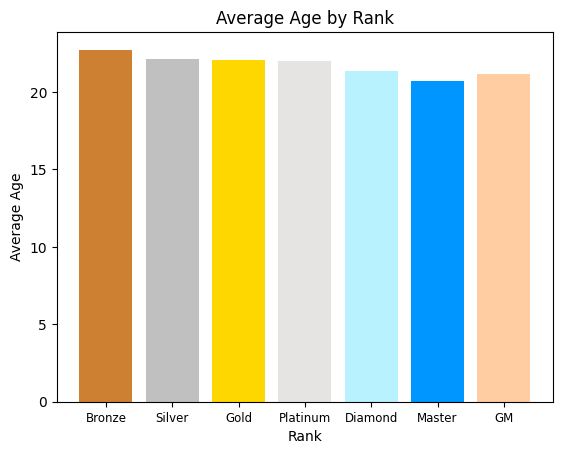

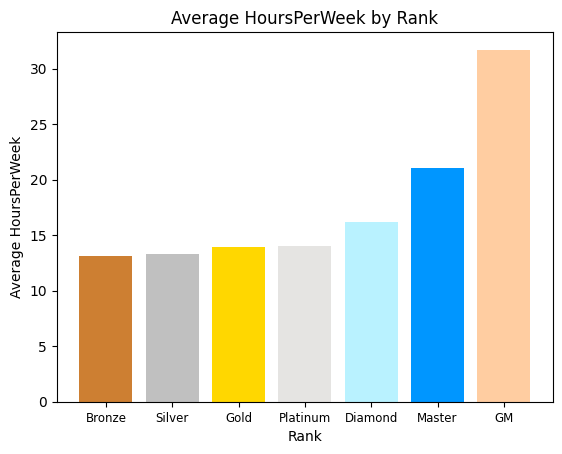

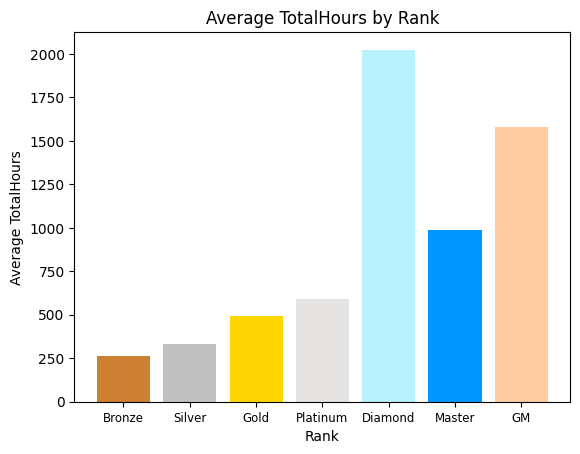

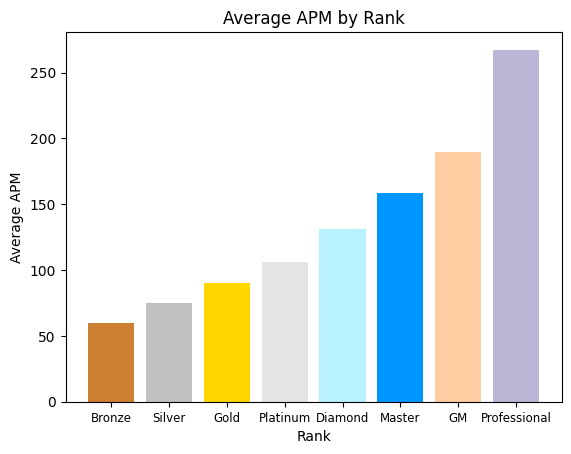

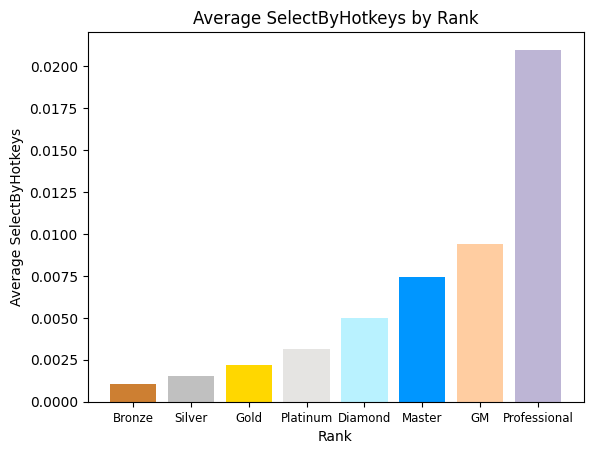

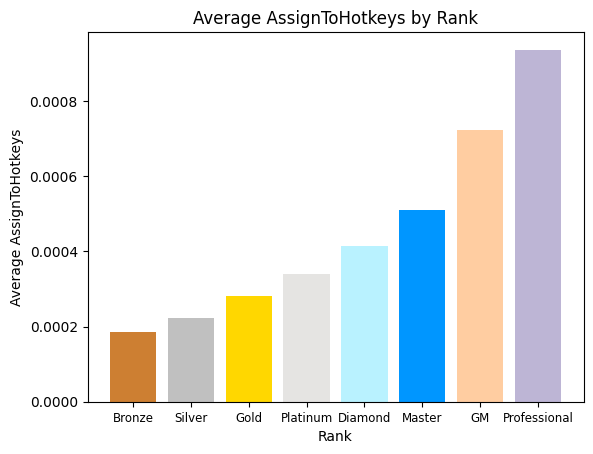

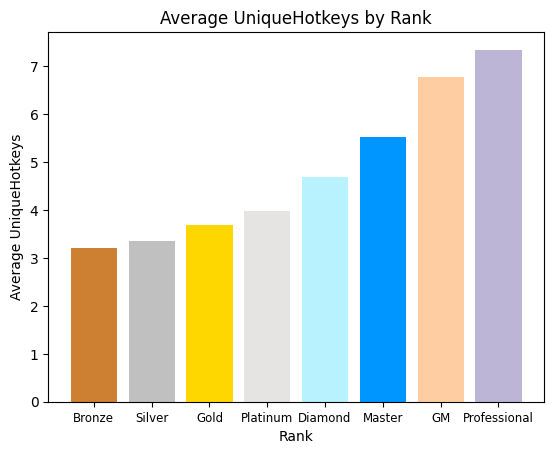

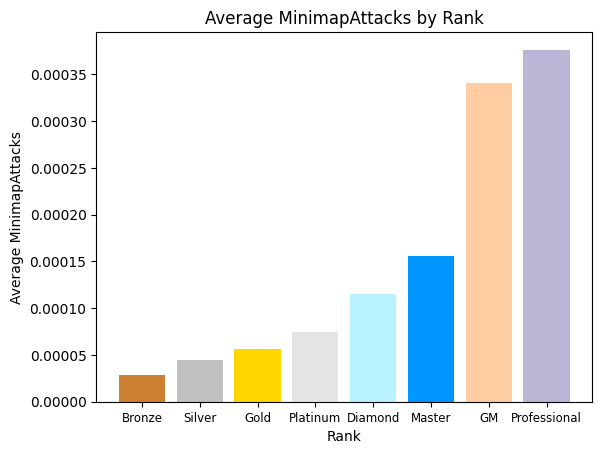

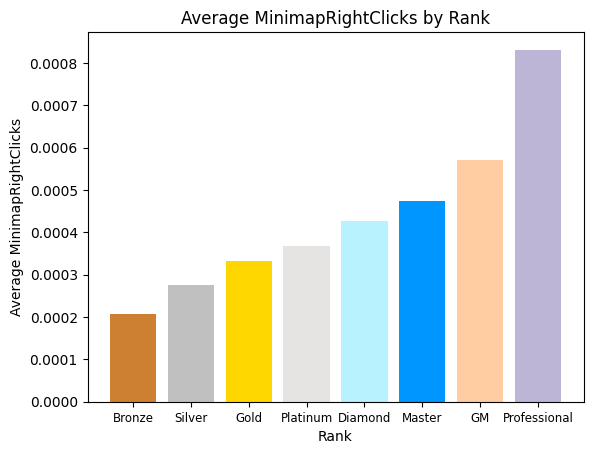

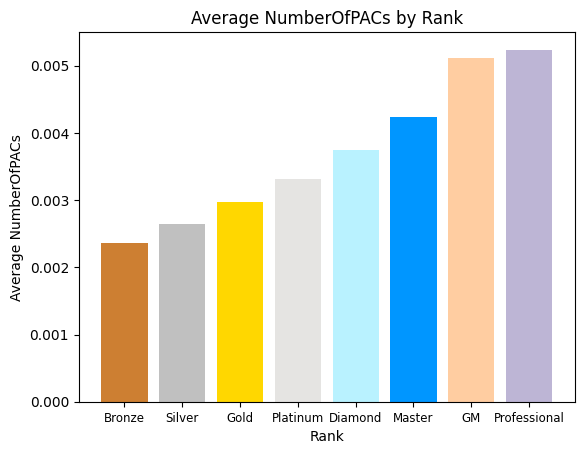

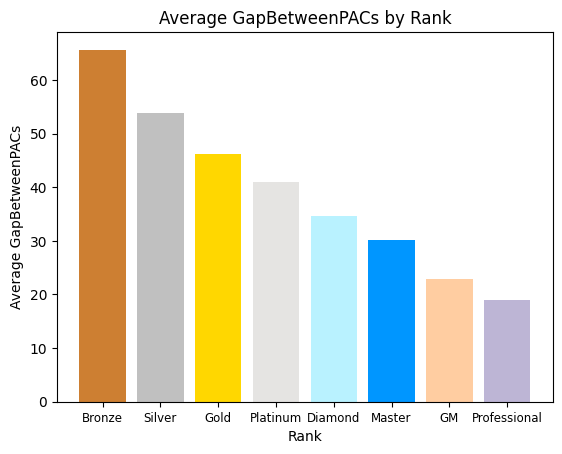

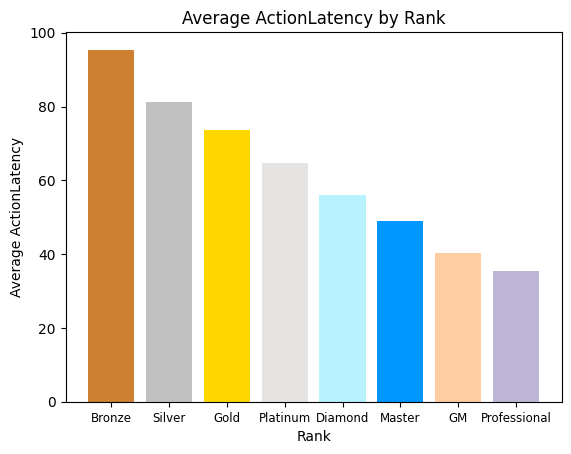

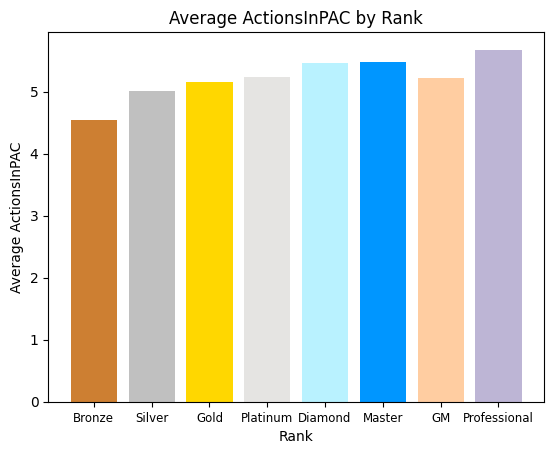

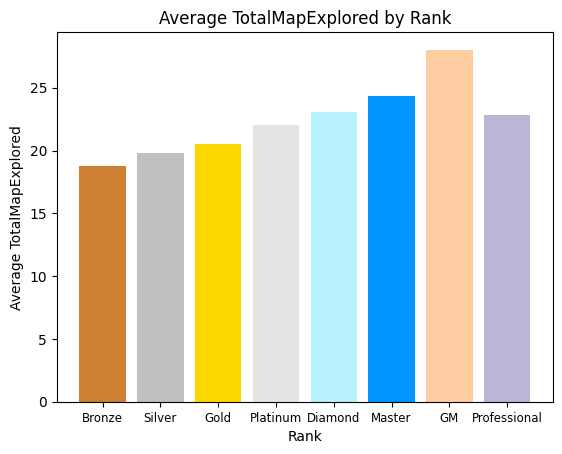

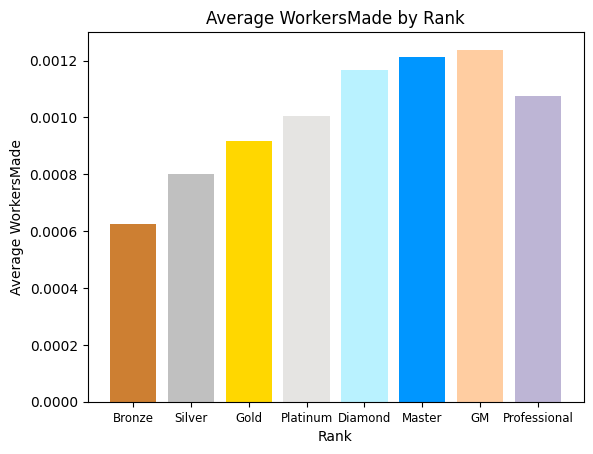

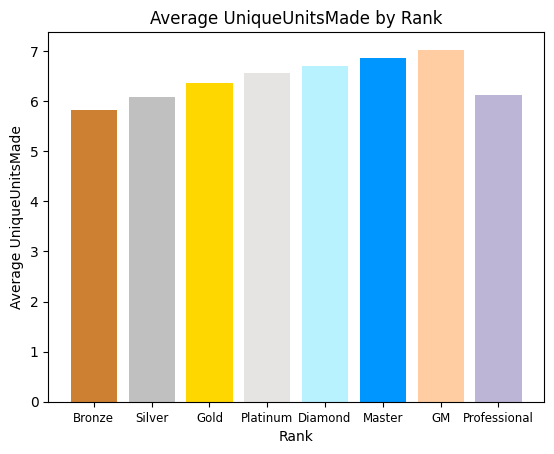

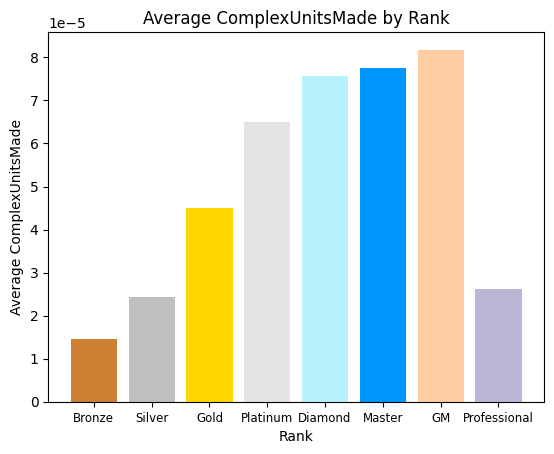

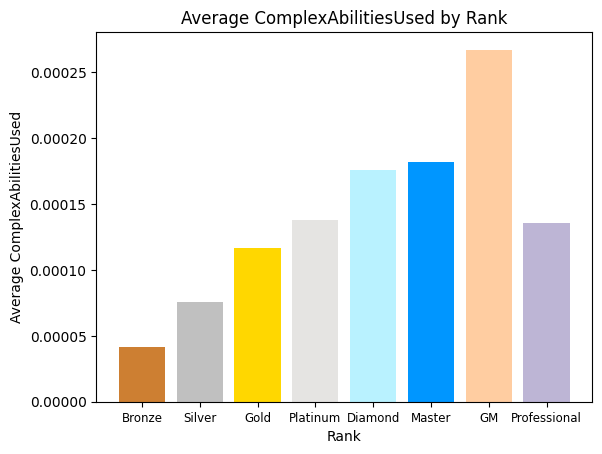

In [72]:
for col in sc.columns[2:-1]:
    plot_mean_by_rank(sc, col)

Preliminarily, the following features will be excluded when building the model:
- Age
- Hours
- Total Hours
- Unique Units Made
- Actions in PAC